In [1]:
import pandas as pd
import numpy as np
#import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# From the  sklearn.model_selection importing the necessary modules
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# From the  sklearn.linear_model importing the necessary module
from sklearn.linear_model import LogisticRegression
# from sklearn.tree importing the necessary module
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics importing the necessary modules
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, auc
#Importing the visualization tools
from IPython.display import Image  
#import graphviz
from sklearn.tree import export_graphviz, plot_tree
# from sklearn.neighbors importing the necessary module
from sklearn.neighbors import KNeighborsClassifier 
# from.preprocessing importing the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.ensemble importing the necessary modules
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

In [2]:
# importing the data and getting the info
url="E:\\machine learning\\كورس الدكتور ساعد\\data\\loan_data.csv"
credit= pd.read_csv(url)
print('='*50)
credit.info()
print('='*50)
credit.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1


In [3]:
credit.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [4]:
# Looking for missing data
credit.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
credit.describe

<bound method NDFrame.describe of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.0

In [6]:
# Describing dataset numeric credit.describe()
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [7]:
# Describing dataset object data.describe()
credit.describe(include='object').T

,count,unique,top,freq
purpose,9578,7,debt_consolidation,3957


In [8]:
credit['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

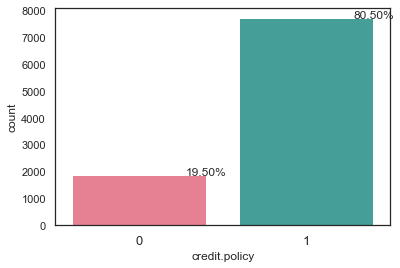

In [9]:
# Plot the target variable
sns.set(style="white")
ax=sns.countplot(x='credit.policy', data=credit, palette="husl")
plt.xticks(size=13)
total = float(len(credit))
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = False

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [10]:


X = credit.drop(['credit.policy','purpose'], axis=1)
y = credit['credit.policy']



# Split the data:
#     - Using 25% for test test
#     - Use 10 for random state
#     - Use stratification sampling
# -----------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25, 
                                                    random_state=10,
                                                    stratify=y)



In [11]:


# Scaling the numeric data
sc=StandardScaler()
X_train = sc.fit_transform(X_train[['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']])
X_test = sc.transform(X_test[['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']])





[[ 322  145]
 [  62 1866]]


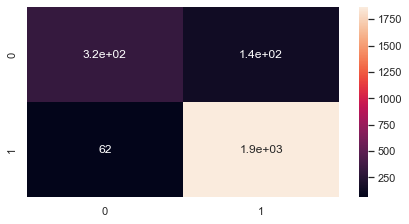

In [12]:

#Running Logistic Regression

Logistic_Model = LogisticRegression().fit(X_train, y_train)
#prediction using Logistic model
y_pre_Logistic= Logistic_Model.predict(X_test)

cm_Logistic= confusion_matrix(y_test, y_pre_Logistic)
sns.heatmap(cm_Logistic, annot=True)
print(confusion_matrix(y_test, y_pre_Logistic))


In [13]:
print(classification_report(y_test, y_pre_Logistic))


# The Logistic model AUC score
# -------------------------
y_pred_logic_prob = Logistic_Model.predict_proba(X_test)
fpr_logic, tpr_logic, thresholds = roc_curve(y_test, y_pred_logic_prob[:,1])
auc_logic = auc(fpr_logic, tpr_logic)

print ('The Logistic AUC Score is: {:.4f}'.format(auc_logic))
print("*"*40)




              precision    recall  f1-score   support

           0       0.84      0.69      0.76       467
           1       0.93      0.97      0.95      1928

    accuracy                           0.91      2395
   macro avg       0.88      0.83      0.85      2395
weighted avg       0.91      0.91      0.91      2395

The Logistic AUC Score is: 0.9382
****************************************


In [14]:
#Classification Decision Tree Hyperparameter
#Define param_grid
decision_tree = DecisionTreeClassifier(random_state=1711) 
                               
params_decision_tree = {
    'max_depth': [2, 3, 4, 6, 8, 10],
    'min_samples_leaf':[0.08,0.1, .12, 0.14, .16, .18],
    }

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator = decision_tree, 
                       param_grid= params_decision_tree,
                       scoring='roc_auc',
                       cv= 10,
                       n_jobs= -1)

In [15]:
# Fit the GridSearchCV object
grid_dt.fit(X_train, y_train)


# Extract best hyperparameters from 'grid_dt' and print them
best_hyperparams = grid_dt.best_params_

print('Best hyerparameters:\n'.center(40))
print("="*50)
print(best_hyperparams)
print("*"*50)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_

print('Best CV accuracy {}'.format(best_CV_score))


# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

print("*"*50)
print("The best estimator is:")
print("-"*len("The best estimator is:"))
print(best_model)
print("*"*50)

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]
best_model.predict_proba
# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
print("="*50)

         Best hyerparameters:
          
{'max_depth': 8, 'min_samples_leaf': 0.08}
**************************************************
Best CV accuracy 0.9326844114405572
**************************************************
The best estimator is:
----------------------
DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.08, random_state=1711)
**************************************************
Test set ROC AUC score: 0.946


In [16]:
#fit the model
Decision_Tree = DecisionTreeClassifier(max_depth=8,
                                       min_samples_leaf=0.08,
                                       random_state=1711) 
Decision_Tree.fit(X_train, y_train)
#predict the model
y_pred_dt=Decision_Tree.predict(X_test)

In [17]:
# Predict the test set probabilities of the positive class
y_pred_proba =Decision_Tree.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
print("="*50)
# accuracy 
score= accuracy_score(y_test, y_pred_dt)
print('score: {:.3f}'.format(score))
print("="*50)
print(classification_report(y_test, y_pred_dt))

Test set ROC AUC score: 0.946
score: 0.909
              precision    recall  f1-score   support

           0       0.88      0.62      0.73       467
           1       0.91      0.98      0.95      1928

    accuracy                           0.91      2395
   macro avg       0.89      0.80      0.84      2395
weighted avg       0.91      0.91      0.90      2395



In [18]:
# The Decision Tree model AUC score
# -------------------------
y_pred_dt_prob = Decision_Tree.predict_proba(X_test)
fpr_dtree, tpr_dtree, thresholds = roc_curve(y_test, y_pred_dt_prob[:,1])
auc_tree = auc(fpr_dtree, tpr_dtree)

print ('The Decision Tree AUC Score is: {:.4f}'.format(auc_tree))
print("*"*40)

The Decision Tree AUC Score is: 0.9457
****************************************


In [19]:

#KNeighborsClassifier KNN`

# Create empty list for storing the accuracy on both train and test sets

training_accuracy = [] 
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_space = range(1, 10)

# Loop over the k neighobors_space (1, 10)
for n_neighbors in neighbors_space:
    
# build the KNN classifier model
    clss = KNeighborsClassifier(n_neighbors = n_neighbors)
    clss.fit(X_train, y_train) 
    
    # Record the training set accuracy
    training_accuracy.append(clss.score(X_train, y_train)) 
    
    # record generalization accuracy 
    test_accuracy.append(clss.score(X_test, y_test))



[[ 272  195]
 [  22 1906]]
                        The model Accuracy is                         
Test set accuracy: 0.91
----------------------------------------------------------------------


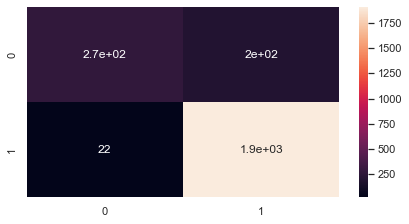

In [20]:
# Create and fit a knn classifier Object with k=7
KNN_MODEL= KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)

#prediction using KNN model 
y_pred_knn=KNN_MODEL.predict(X_test)
#confusion Matrix
cm_knn=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm_knn, annot=True)
print(confusion_matrix(y_test,y_pred_knn))
# Score the knn classifier 
acc_knn = KNN_MODEL.score(X_test, y_test)

# Print the accuracy
print("The model Accuracy is".center(70))
print("="*70)
print("Test set accuracy: {:.2f}".format(acc_knn))
print("-"*70)

In [21]:
# The Knn Model model AUC score
# -------------------------
y_pred_knn_prob = KNN_MODEL.predict_proba(X_test)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_knn_prob[:,1])
auc_knn = auc(fpr_knn, tpr_knn)

print ('The KNN AUC Score is: {:.4f}'.format(auc_knn))
print("*"*40)

The KNN AUC Score is: 0.9383
****************************************


In [22]:

#Voting Classifier

# logistic regression (Logistic_Model)

#  knn (KNN_MODEL)

# Instantiate Decision Tree (Decision_Tree)

# Define the list classifiers
classifiers = [('Logistic Regression', Logistic_Model), 
               ('K Nearest Neighbours', KNN_MODEL), 
               ('Classification Tree', Decision_Tree)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:20}: {:.3f}'.format(clf_name,  accuracy))



Logistic Regression : 0.914
K Nearest Neighbours: 0.909
Classification Tree : 0.909


In [23]:
# Instantiate a VotingClassifier vc
Voting_Classifier = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
Voting_Classifier.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred_voting = Voting_Classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred_voting, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.927


In [24]:

#Bagging

# Instantiate Decision Tree (Decision_Tree)


# Instantiate bg
# ==============
Bagging_Classifier = BaggingClassifier(base_estimator=Decision_Tree,
                       n_estimators= 300,
                       oob_score=True,                
                       random_state=1711)


# Fit bc to the training set
# =========================
Bagging_Classifier.fit(X_train, y_train)

# Predict test set labels
# -----------------------
y_pred = Bagging_Classifier.predict(X_test)

# Evaluate OOB accuracy
# ---------------------
oob_acc = Bagging_Classifier.oob_score_

# Evaluate test set accuracy
# --------------------------
test_acc = accuracy_score(y_pred, y_test)

# Print acc_test and acc_oob
# --------------------------
print("*"*50)
print('Test set accuracy: {:.3f}'.format(test_acc))
print("*"*50)
print('The OOB accuracy: {:.3f}'.format(oob_acc))



**************************************************
Test set accuracy: 0.909
**************************************************
The OOB accuracy: 0.896


In [29]:
# logistic regression (Logistic_Model)

# Instantiate bc
# ==============
Bagging_Classifier_Logistic = BaggingClassifier(base_estimator=Logistic_Model,
                       n_estimators= 300,
                       oob_score=True,
                       random_state=1711)


# Fit bc to the training set
# =========================
Bagging_Classifier_Logistic.fit(X_train, y_train)

# Predict test set labels
# -----------------------
y_pred = Bagging_Classifier_Logistic.predict(X_test)

# Evaluate test set accuracy
# --------------------------
test_acc = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
# ---------------------
oob_acc =  Bagging_Classifier_Logistic.oob_score_

# Print acc_test and acc_oob
# --------------------------
print("*"*50)
print('Test set accuracy: {:.3f}'.format(test_acc))
print("*"*50)
print('The OOB accuracy: {:.3f}'.format(oob_acc))

**************************************************
Test set accuracy: 0.913
**************************************************
The OOB accuracy: 0.900


In [30]:
#  knn (KNN_MODEL)

# Instantiate bc
# ==============
Bagging_Classifier_knn = BaggingClassifier(base_estimator=KNN_MODEL,
                       n_estimators= 30,
                       oob_score=True,                    
                       random_state=1711)


# Fit bc to the training set
# =========================
Bagging_Classifier_knn.fit(X_train, y_train)

# Predict test set labels
# -----------------------
y_pred = Bagging_Classifier_knn.predict(X_test)

# Evaluate test set accuracy
# --------------------------
test_acc = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
# ---------------------
oob_acc = Bagging_Classifier_knn.oob_score_

# Print acc_test and acc_oob
# --------------------------
print("*"*50)
print('Test set accuracy: {:.3f}'.format(test_acc))
print("*"*50)
print('The OOB accuracy: {:.3f}'.format(oob_acc))

**************************************************
Test set accuracy: 0.910
**************************************************
The OOB accuracy: 0.901


In [33]:

#Random Forest

# Instantiate a random forests classifier 'RandomForest_Classifier'
RandomForest_Classifier = RandomForestClassifier(random_state= 1711)

# Define a grid of hyperparameter 'params_rf_reg' (the same for classifier)
params_rf_clf = {
              'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [2, 4, 6, 8],
              'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_features': ['log2', 'sqrt']
}


# Instantiate 'grid_rf_clf'
grid_rf_clf = GridSearchCV(estimator=RandomForest_Classifier,
                       param_grid=params_rf_clf,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)


 # Fit 'grid_rf_clf' to the training set
grid_rf_clf.fit(X_train, y_train)

 # Extract the best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf_clf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

 # Extract the best model from 'grid_rf'
best_model = grid_rf_clf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate test set accurac
test_acc = accuracy_score(y_pred, y_test)

# Print the test set RMSE
print('The Accuracy is : {:.2f}'.format(test_acc))



Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best hyperparameters:
 {'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 100}
The Accuracy is : 0.81


[[   0  467]
 [   0 1928]]


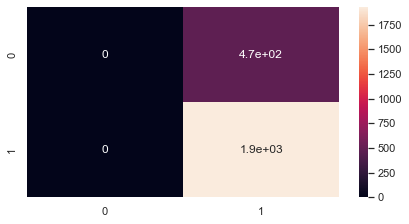

In [32]:
cm_RandomForest = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_RandomForest, annot=True)
print(confusion_matrix(y_test, y_pred))

In [34]:


# Predict the test set probabilities of the positive class
y_pred_proba =best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("="*50)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
print("="*50)



Test set ROC AUC score: 0.887


In [35]:
# Instantiate a random forests classifier 'RandomForest_Classifier'
RandomForest_Classifier1 = RandomForestClassifier(random_state= 1711)

# Define a grid of hyperparameter 'params_rf_reg' (the same for classifier)
params_rf_clf1 = {
              'n_estimators': [100],
              'max_depth': [2],
              'min_samples_leaf': [0.1],
              'max_features': ['log2']
}


grid_rf_clf1 = GridSearchCV(estimator=RandomForest_Classifier1,
                       param_grid=params_rf_clf1,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)


 # Fit 'grid_rf_clf' to the training set
grid_rf_clf1.fit(X_train, y_train)

# Predict the test set labels
y_pred_random = grid_rf_clf1.predict(X_test)

# Evaluate test set accurac
test_acc = accuracy_score(y_pred_random, y_test)

# Print the test set RMSE
print('The Accuracy is : {:.2f}'.format(test_acc))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The Accuracy is : 0.81


In [36]:


# Predict the test set probabilities of the positive class
y_pred_proba1 =grid_rf_clf1.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba1)

print("="*50)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
print("="*50)



Test set ROC AUC score: 0.887
